In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('CrimesOnWomenData.csv', index_col=False)
df_des = pd.read_csv('description.csv')

In [3]:
df.head(5)

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.sample(5)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
222,NAGALAND,2007,13,6,0,8,1,0,0
101,PUDUCHERRY,2003,2,13,1,56,27,4,0
151,MANIPUR,2005,25,69,0,25,0,20,0
499,Manipur,2015,46,94,0,84,2,39,0
707,Haryana,2021,1716,2958,275,2882,290,5755,28


In [6]:
df_des

,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths
5,5,AoW,Assault against women
6,6,AoM,Assault against modesty of women
7,7,DV,Domestic violence
8,8,WT,Women Trafficking


In [7]:
df_des.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

Checking shape of the dataset

In [8]:
df.shape

(736, 9)

Checking missing values in dataset

In [10]:
df.isnull().sum()

,0
State,0
Year,0
Rape,0
K&A,0
DD,0
AoW,0
AoM,0
DV,0
WT,0


In [11]:
# Create a dictionary for column renaming
column_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap and Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Minors',
    'DV': 'Domestic Violence',
    'WT': 'Witchcraft'
}

# Rename columns in the dataset
df.rename(columns=column_names, inplace=True)

# Check the renamed columns
print("\nRenamed Columns:")
print(df.columns)


Renamed Columns:
Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')


Checking info of the dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               736 non-null    object
 1   Year                736 non-null    int64 
 2   Rape Cases          736 non-null    int64 
 3   Kidnap and Assault  736 non-null    int64 
 4   Dowry Deaths        736 non-null    int64 
 5   Assault on Women    736 non-null    int64 
 6   Assault on Minors   736 non-null    int64 
 7   Domestic Violence   736 non-null    int64 
 8   Witchcraft          736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB


Checking descriptive statistics

In [14]:
df.describe()

,Year,Rape Cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


**EDA**

In [16]:
df['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli',
  

In [17]:
df['State'].nunique()

70

There are 70 unique values in State column

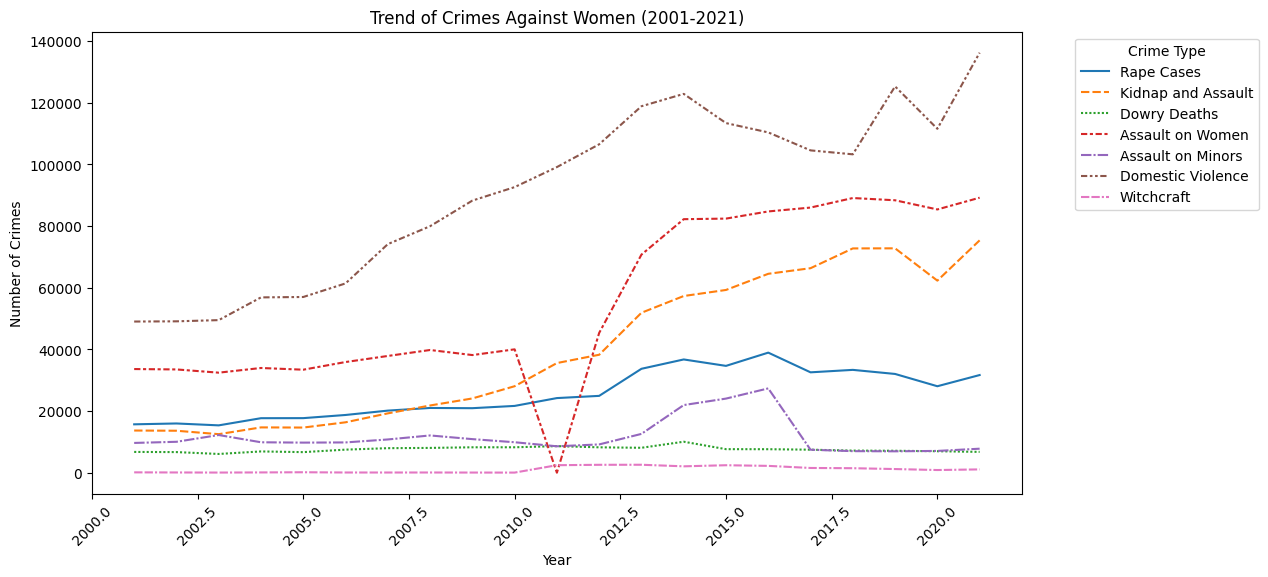

In [19]:
# Group by year and sum up all crime types
import matplotlib.pyplot as plt
import seaborn as sns
crime_trend = df.groupby('Year').sum()

# Plotting the trend of different crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend)
plt.title('Trend of Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the figure above it is clear that Domestic Violence in Increasing every Year.

<Figure size 1200x600 with 0 Axes>

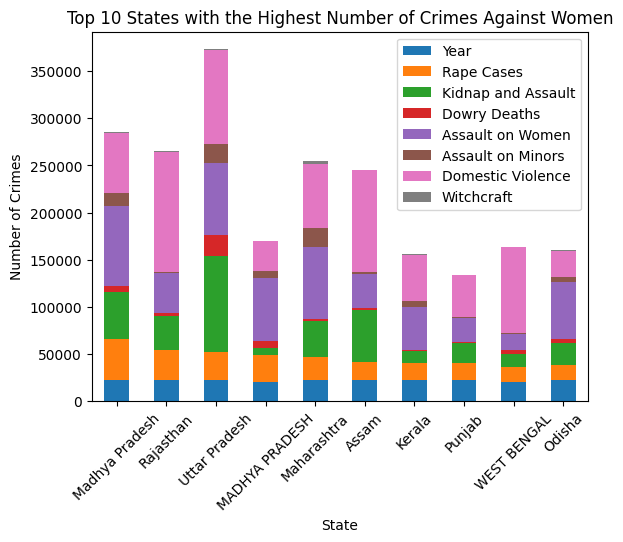

In [20]:
# Total crimes by state
state_crime = df.groupby('State').sum().sort_values(by='Rape Cases', ascending=False)

# Top 10 states with the highest number of crimes
top_states = state_crime.head(10)

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 States with the Highest Number of Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

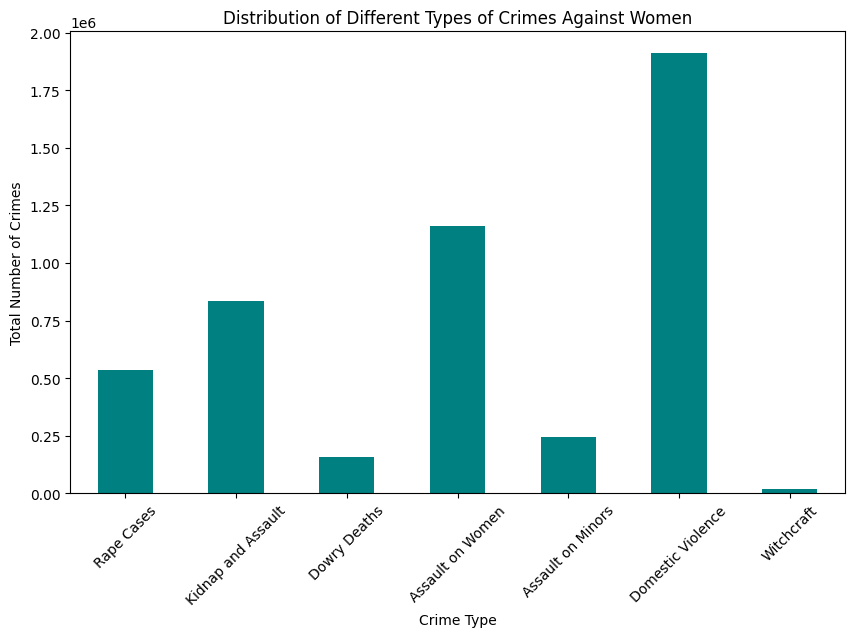

In [21]:
# Sum up all crimes to get a sense of distribution
crime_distribution = df.drop(['State', 'Year'], axis=1).sum()

plt.figure(figsize=(10, 6))
crime_distribution.plot(kind='bar', color='teal')
plt.title('Distribution of Different Types of Crimes Against Women')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.show()

Domestic Violence and Assault on Women has high number of Crimes

<Figure size 1000x800 with 0 Axes>

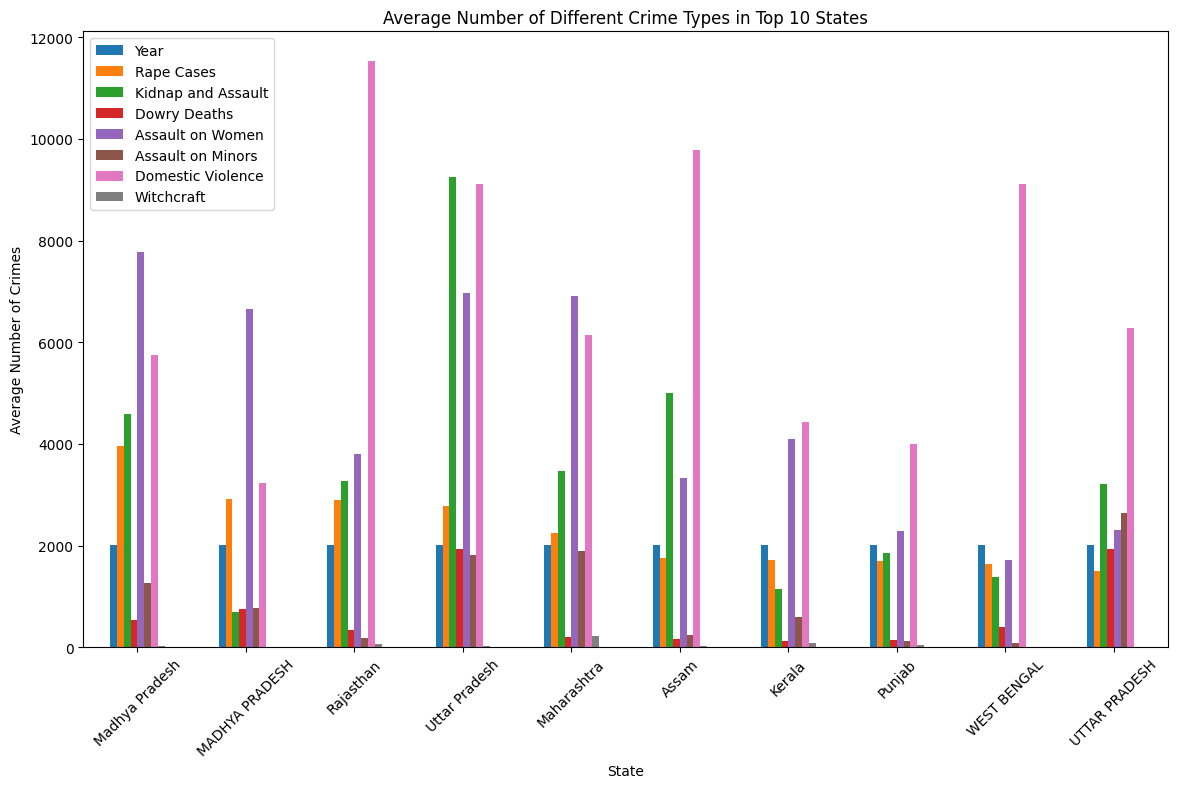

In [22]:
# Calculate the mean number of each crime type for the top 10 states with the highest total crime numbers
top_states_mean_crime = df.groupby('State').mean().sort_values(by='Rape Cases', ascending=False).head(10)

# Plot the comparison
plt.figure(figsize=(10, 8))
top_states_mean_crime.plot(kind='bar', figsize=(14, 8))
plt.title('Average Number of Different Crime Types in Top 10 States')
plt.xlabel('State')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=45)
plt.show()

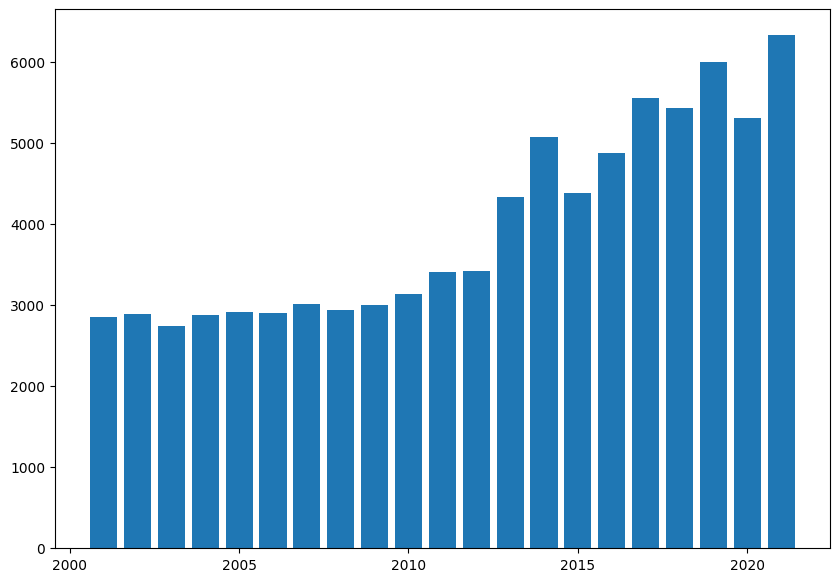

In [23]:
### Checking the crime rate of Rape Case with respect to year
plt.figure(figsize=(10, 7))
plt.bar(x='Year', data=df, height='Rape Cases')
plt.show()

In [24]:
cases_in_each_year = df.groupby('Year').sum().sort_values(by='Year', ascending=True)
cases_in_each_year.drop(columns=['State'], axis=1, inplace=True)

In [25]:
cases_in_each_year

,Rape Cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft
Year,,,,,,,
2001,15694,13681,6738,33622,9656,49032,114
2002,15970,13613,6687,33497,10027,49102,76
2003,15357,12499,6078,32450,12220,49492,46
2004,17682,14697,6900,33966,9871,56867,89
2005,17701,14644,6673,33413,9759,56995,148
2006,18725,16348,7481,35899,9822,61400,67
2007,20139,19249,7955,37866,10783,74143,61
2008,21001,21803,8043,39802,12084,79957,67
2009,20928,24086,8242,38159,10891,88263,48


In [26]:
df['Total Crimes'] = df[['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths', 'Assault on Women', 'Assault on Minors', 'Domestic Violence', 'Witchcraft']].sum(axis=1)

In [27]:
cases_in_each_year['Total Crimes'] = cases_in_each_year[['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths', 'Assault on Women', 'Assault on Minors', 'Domestic Violence', 'Witchcraft']].sum(axis=1)

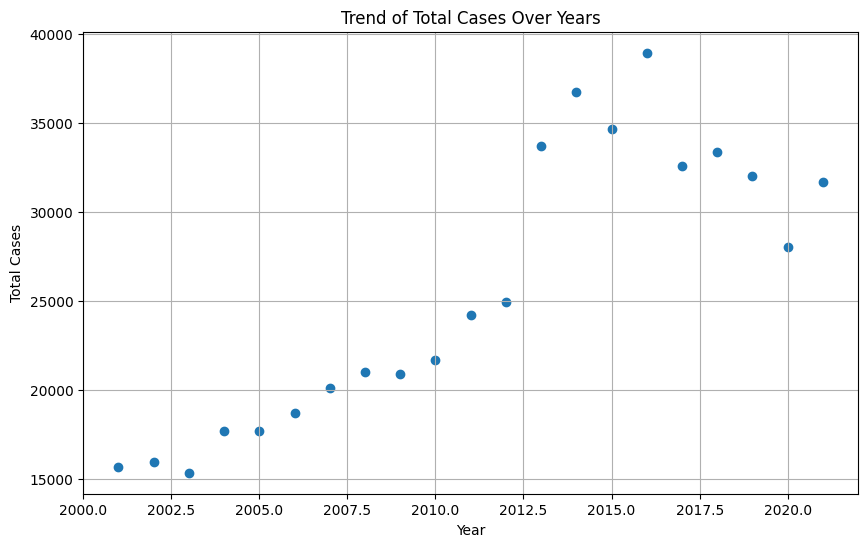

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(cases_in_each_year.index, cases_in_each_year['Rape Cases'])
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Trend of Total Cases Over Years')
plt.grid(True)
plt.show()

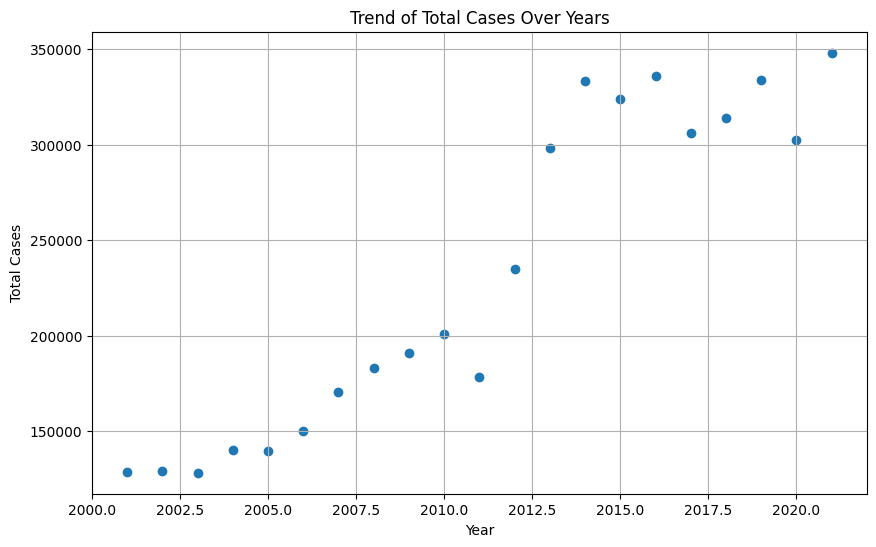

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(cases_in_each_year.index, cases_in_each_year['Total Crimes'])
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Trend of Total Cases Over Years')
plt.grid(True)
plt.show()

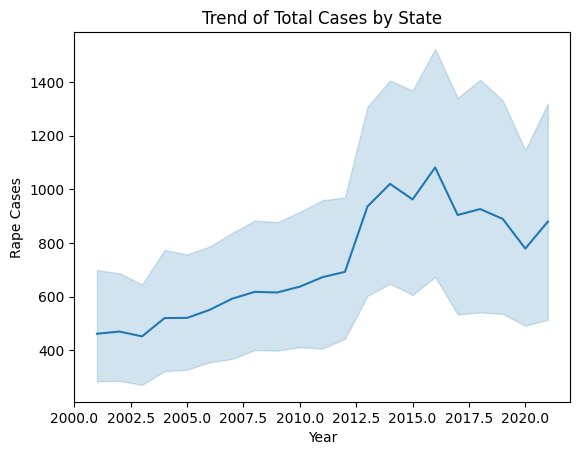

In [30]:
import seaborn as sns

# Group the data by both `State` and `Year`
cases_by_state_year = df.groupby(['State', 'Year']).sum().reset_index()

# Create a line plot using Seaborn
sns.lineplot(x='Year', y='Rape Cases', data=cases_by_state_year)
plt.title('Trend of Total Cases by State')
plt.show()

In [31]:
### Set the columns and rows option to max
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
# Group data by State and Year
grouped_data = df.groupby(['State', 'Year']).sum().reset_index()

# Calculate year-over-year differences
grouped_data['Difference'] = grouped_data.groupby('State')['Total Crimes'].diff()

# Filter for states with consistently increasing crime
increasing_states = grouped_data[grouped_data['Difference'] > 0]

# Print or visualize the results
increasing_states
# You can also create a line plot or bar chart to visualize the trends

,State,Year,Rape Cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft,Total Crimes,Difference
3,A & N ISLANDS,2004,10,3,0,6,3,5,0,27,5.0
5,A & N ISLANDS,2006,6,5,0,14,4,7,0,36,14.0
6,A & N ISLANDS,2007,3,9,1,21,2,18,0,54,18.0
7,A & N ISLANDS,2008,12,13,2,24,3,26,0,80,26.0
8,A & N ISLANDS,2009,18,14,1,30,7,21,0,91,11.0
11,A & N Islands,2012,12,7,2,10,4,5,2,42,6.0
12,A & N Islands,2013,27,12,1,45,8,9,4,106,64.0
13,A & N Islands,2014,32,17,0,41,18,14,1,123,17.0
14,A & N Islands,2015,36,21,0,57,23,14,0,151,28.0
17,A & N Islands,2018,30,2,0,35,4,4,0,75,5.0


In [33]:
# prompt: Using dataframe increasing_states: box plot

import altair as alt
alt.Chart(increasing_states).mark_boxplot().encode(
    x='State:N',
    y='Total Crimes:Q'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

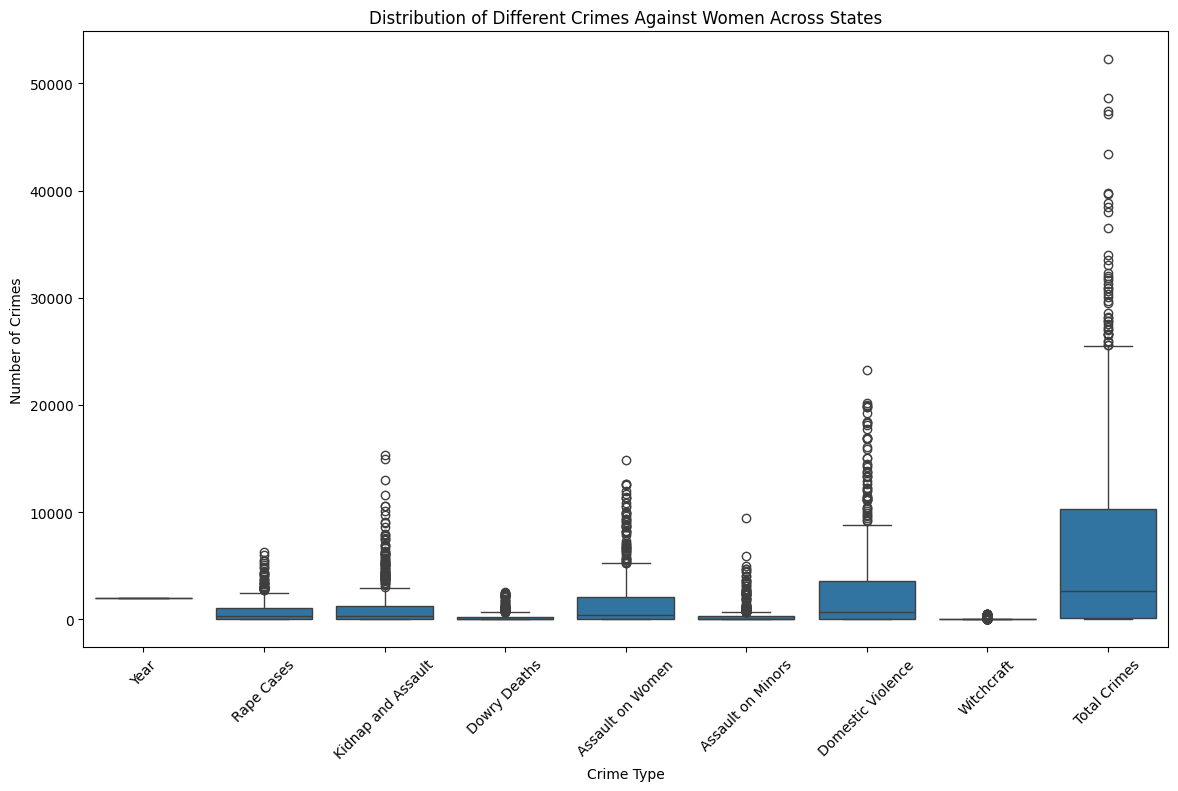

In [36]:
# Melt the DataFrame to plot multiple crime types
df_filtered = df
melted_df = df_filtered.melt(id_vars=['State'], var_name='Crime Type', value_name='Number of Crimes')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Crime Type', y='Number of Crimes', data=melted_df)
plt.title('Distribution of Different Crimes Against Women Across States')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Create a scatter plot with states on the x-axis and a dummy y-axis (for visualization purposes)
import plotly.express as px
fig = px.scatter(df_filtered,
                 x="State",
                 y=[0]*len(df_filtered),  # Dummy Y axis
                 size="Rape Cases",
                 color="Rape Cases",
                 hover_name="State",
                 title="Rape Cases in India by State",
                 size_max=100,
                 color_continuous_scale=px.colors.sequential.Viridis)  # Change color scale here

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Increase plot width
fig.update_layout(yaxis=dict(visible=False),
                  xaxis=dict(tickangle=45),
                  showlegend=False,
                  width=1200)  # Adjust width here

fig.show()

In [39]:
df_filtered.columns

Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft', 'Total Crimes'],
      dtype='object')

In [40]:
import plotly.express as px

# List of crime types to iterate through
crime_types = ["Rape Cases", 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft',]  # Add more crime types as needed

# Loop through each crime type and create a scatter plot
for crime in crime_types:
    fig = px.scatter(df_filtered,
                     x="State",
                     y=[0]*len(df_filtered),  # Dummy Y axis
                     size=crime,
                     color=crime,
                     hover_name="State",
                     title=f"{crime} in India by State",
                     size_max=100,
                     color_continuous_scale=px.colors.sequential.Viridis)  # Change color scale here

    fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

    # Increase plot width
    fig.update_layout(yaxis=dict(visible=False),
                      xaxis=dict(tickangle=45),
                      showlegend=False,
                      width=1200)  # Adjust width here

    fig.show()